# **Data Analytics Course Project**

In [2]:
# import libraries

import pandas as pd
import sqlite3

import warnings
warnings.filterwarnings('ignore')

## **Familiarise with the dataset**

In [3]:
df = pd.read_excel('wikipedia_dataset.xlsx')

In [4]:
print(f' There are {df.shape[0]} rows and {df.shape[1]} columns')
df.head(2)

 There are 1500 rows and 367 columns


,Page,2016-01-01 00:00:00,2016-01-02 00:00:00,2016-01-03 00:00:00,2016-01-04 00:00:00,2016-01-05 00:00:00,2016-01-06 00:00:00,2016-01-07 00:00:00,2016-01-08 00:00:00,2016-01-09 00:00:00,...,2016-12-22 00:00:00,2016-12-23 00:00:00,2016-12-24 00:00:00,2016-12-25 00:00:00,2016-12-26 00:00:00,2016-12-27 00:00:00,2016-12-28 00:00:00,2016-12-29 00:00:00,2016-12-30 00:00:00,2016-12-31 00:00:00
0,.xxx_en.wikipedia.org_all-access_all-agents,7089,7592,7436,7032,6498,6887,7209,7022,7194,...,4931.0,4034.0,5204.0,4331.0,4572.0,4509.0,5392.0,4950.0,2931.0,4101.0
1,.xxx_en.wikipedia.org_mobile-web_all-agents,6182,6447,6437,5912,5205,5770,5998,5948,6165,...,4617.0,3663.0,4882.0,4028.0,4263.0,4176.0,5068.0,4539.0,2666.0,3754.0


In [5]:
df.isnull().sum().sum()

87

*87 NULL values indicating no visits 87 times across the dataset*

In [7]:
# ivestigate rows with null values

dfnull = df[df.isnull().any(axis=1)]
print(f' There are {dfnull.shape[0]} rows and {dfnull.shape[1]} columns')
print (dfnull)

 There are 2 rows and 367 columns
                                                   Page  2016-01-01 00:00:00  \
38    ã‚¬ãƒ¼ã‚¼ã‚ªãƒ¼ãƒž_ja.wikipedia.org_all-access...                    5   
1419  User:GoogleAnalitycsRoman/google-api_en.wikipe...                40324   

      2016-01-02 00:00:00  2016-01-03 00:00:00  2016-01-04 00:00:00  \
38                      3                    4                    5   
1419                66391                48806               219804   

      2016-01-05 00:00:00  2016-01-06 00:00:00  2016-01-07 00:00:00  \
38                     21                    9                   19   
1419               243016               215221               234044   

      2016-01-08 00:00:00  2016-01-09 00:00:00  ...  2016-12-22 00:00:00  \
38                      7                    9  ...                189.0   
1419               215551                92019  ...                  NaN   

      2016-12-23 00:00:00  2016-12-24 00:00:00  2016-12-25 00:00:00 

*Rows 38 and 1419 contain NULL values*

## **Transforming data using Power BI**

- Convert to time series data
- Create new variables from existing information
    - FROM Page (Search_topic, language_ID, Device_type)
    - FROM Date (Day of Month, Month, Year, Weekday)
- Create new table "languages" to show definition of "language_ID"
- Export each table as csv file

## **Familiarise with the transformed dataset**

In [8]:
wikipedia_dataset = pd.read_csv("toarstn92_wikipedia_dataset.csv")
print(f' There are {wikipedia_dataset.shape[0]} rows and {wikipedia_dataset.shape[1]} columns')
wikipedia_dataset.head(2)

 There are 549000 rows and 12 columns


,Page,Date,Webpage Visits,Month,Month Name,Day of Month,Weekday,Search_topic,language_ID,Device_type,Year,Weekday_ID
0,.xxx_en.wikipedia.org_all-access_all-agents,2016-01-01 00:00:00.000,7089,1,January,1,Friday,.xxx,en,all access,2016,6
1,2014_FIFA_World_Cup_en.wikipedia.org_all-acces...,2016-01-01 00:00:00.000,5363,1,January,1,Friday,2014_FIFA_World_Cup,en,all access,2016,6


In [9]:
languages = pd.read_csv("toarstn92_languages.csv")
print(f' There are {languages.shape[0]} rows and {languages.shape[1]} columns')
languages. head(2)

 There are 183 rows and 3 columns


,language_id,ISO language name,Notes
0,aa,Afar,NaN
1,af,Afrikaans,NaN


## **Creating db file using DB Browser (SQLite)**

- Import csv files as table in new database

## **Connecting to SQL server database**

Install some dependencie
 - Running on the Notebook;
      - `pip install sqlalchemy`
      - `pip install ipython-sql`
      - `pip install pymysql`


 - Running on Google Colab (For each notebook); 
      - `pip install pymysql`

In [17]:
# SQL magic command

%load_ext sql

In [23]:
# Load SQLite database

%sql sqlite:///toarstn92_wikipedia.db

## **Familiarise with the database**

In [148]:
%%sql

SELECT name
FROM sqlite_schema
WHERE type='table'
ORDER BY name;

 * sqlite:///toarstn92_wikipedia.db
Done.


name
DeviceType2
SearchTopic2
languages1
languages2
month2
sqlite_sequence
toarstn92_languages
toarstn92_wikipedia_dataset
week2
wikipedia_dataset1


In [26]:
%%sql

PRAGMA table_info(toarstn92_wikipedia_dataset)

 * sqlite:///toarstn92_wikipedia.db
Done.


cid,name,type,notnull,dflt_value,pk
0,Page,TEXT,0,None,0
1,Date,TEXT,0,None,0
2,WebpageVisits,INTEGER,0,None,0
3,Month,INTEGER,0,None,0
4,MonthName,TEXT,0,None,0
5,DayofMonth,INTEGER,0,None,0
6,Weekday,TEXT,0,None,0
7,Search_topic,TEXT,0,None,0
8,language_ID,TEXT,0,None,0
9,Device_type,TEXT,0,None,0


In [153]:
%%sql

SELECT *
FROM week2
LIMIT 5;

 * sqlite:///toarstn92_wikipedia.db
Done.


WeekdayID,Weekday
1,Sunday
2,Monday
3,Tuesday
4,Wednesday
5,Thursday


## **Normalising database**

In [28]:
%%sql

--DO NOT EDIT THIS CELL

DROP TABLE IF EXISTS "wikipedia_dataset1";
DROP TABLE IF EXISTS "languages1";

CREATE TABLE "languages1" (
    "languageID" VARCHAR(150),
    "LanguageName" VARCHAR(150),
    "Notes" VARCHAR(150),
    PRIMARY KEY ("languageID")
);

CREATE TABLE "wikipedia_dataset1" (
    "SearchID" INTEGER NOT NULL,
    "Page" VARCHAR(150),
    "Date" NUMERIC,
    "Year"  INTEGER,
    "Month"  INTEGER,
    "MonthName" VARCHAR(150),
    "DayOfMonth" INTEGER,
    "WeekdayID" INTEGER,
    "Weekday" VARCHAR(150),
    "SearchTopic" VARCHAR(150),
    "languageID" VARCHAR(150),
    "DeviceType" VARCHAR(150),
    "WebpageVisits" INTEGER,
    PRIMARY KEY("SearchID" AUTOINCREMENT),
    FOREIGN KEY ("languageID") REFERENCES "languages1" ("languageID")
);

 * sqlite:///toarstn92_wikipedia.db
Done.
Done.
Done.
Done.


[]

In [30]:
%%sql

--DO NOT EDIT THIS CELL

DELETE FROM "wikipedia_dataset1";
DELETE FROM "languages1";

INSERT INTO "wikipedia_dataset1" ("Page","Date","Year","Month","MonthName","DayOfMonth","WeekdayID","Weekday","SearchTopic","languageID","DeviceType","WebpageVisits")
SELECT
    Page,
    Date,
    Year,
    Month,
    MonthName,
    DayofMonth,
    Weekday_ID,
    Weekday,
    Search_topic,
    language_ID,
    Device_type,
    WebpageVisits 
FROM 
    toarstn92_wikipedia_dataset;

INSERT INTO "languages1"("languageID","LanguageName", "Notes")
SELECT DISTINCT 
    language_id,
    ISOlanguagename,
    Notes
FROM
    toarstn92_languages;

 * sqlite:///toarstn92_wikipedia.db
Done.
0 rows affected.
549000 rows affected.
183 rows affected.


[]

In [31]:
%%sql

--DO NOT EDIT THIS CELL

DROP TABLE IF EXISTS "wikipedia_dataset2";
DROP TABLE IF EXISTS "languages2";
DROP TABLE IF EXISTS "month2";
DROP TABLE IF EXISTS "week2";
DROP TABLE IF EXISTS "DeviceType2";
DROP TABLE IF EXISTS "SearchTopic2";


CREATE TABLE "languages2" (
    "languageID" VARCHAR(150),
    "LanguageName" VARCHAR(150),
    "Notes" VARCHAR(150),
    PRIMARY KEY ("languageID")
);

CREATE TABLE "wikipedia_dataset2" (
    "SearchID" INTEGER NOT NULL,
    "Page" VARCHAR(150),
    "Date" NUMERIC,
    "Year"  INTEGER,
    "Month"  INTEGER,
    "DayOfMonth" INTEGER,
    "WeekdayID" INTEGER,
    "SearchTopicID" INTEGER,
    "languageID" VARCHAR(150),
    "DeviceTypeID" INTEGER,
    "WebpageVisits" INTEGER,
    PRIMARY KEY("SearchID" AUTOINCREMENT),
    CONSTRAINT fk_mon FOREIGN KEY ("Month") REFERENCES month2 ("Month"),
    CONSTRAINT fk_wee FOREIGN KEY ("WeekdayID") REFERENCES week2 ("WeekdayID"),
    CONSTRAINT fk_dev FOREIGN KEY ("DeviceTypeID") REFERENCES DeviceType2 ("DeviceTypeID"),
    CONSTRAINT fk_sea FOREIGN KEY ("SearchTopicID") REFERENCES SearchTopic2 ("SearchTopicID"),
    CONSTRAINT fk_lan FOREIGN KEY ("languageID") REFERENCES languages2 ("languageID")
);

CREATE TABLE "month2" (
    "Month"  INTEGER NOT NULL,
    "MonthName" VARCHAR(150),
    PRIMARY KEY("Month")
);

CREATE TABLE "week2" (
    "WeekdayID"  INTEGER NOT NULL,
    "Weekday" VARCHAR(150),
    PRIMARY KEY("WeekdayID")
);

CREATE TABLE "DeviceType2" (
    "DeviceTypeID"  INTEGER NOT NULL,
    "DeviceType" VARCHAR(150),
    PRIMARY KEY("DeviceTypeID" AUTOINCREMENT)
);

CREATE TABLE "SearchTopic2" (
    "SearchTopicID"  INTEGER NOT NULL,
    "SearchTopic" VARCHAR(150),
    PRIMARY KEY("SearchTopicID" AUTOINCREMENT)
);

 * sqlite:///toarstn92_wikipedia.db
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.


[]

In [32]:
%%sql

--DO NOT EDIT THIS CELL

DELETE FROM "languages2";
DELETE FROM "month2";
DELETE FROM "week2";
DELETE FROM "DeviceType2";
DELETE FROM "SearchTopic2";

INSERT INTO "SearchTopic2"("SearchTopic")
SELECT DISTINCT 
    SearchTopic 
FROM
    wikipedia_dataset1;
    
INSERT INTO "DeviceType2"("DeviceType")
SELECT DISTINCT 
    DeviceType 
FROM
    wikipedia_dataset1;
    
INSERT INTO "week2"("WeekdayID", "Weekday")
SELECT DISTINCT 
    WeekdayID,
    Weekday
FROM
    wikipedia_dataset1;
    
INSERT INTO "month2"("Month", "MonthName")
SELECT DISTINCT 
    Month,
    MonthName
FROM
    wikipedia_dataset1;
    
INSERT INTO "languages2"("languageID","LanguageName", "Notes")
SELECT 
    languageID,
    LanguageName,
    Notes
FROM
    languages1;

 * sqlite:///toarstn92_wikipedia.db
Done.
0 rows affected.
0 rows affected.
0 rows affected.
0 rows affected.
956 rows affected.
5 rows affected.
7 rows affected.
12 rows affected.
183 rows affected.


[]

In [33]:
%%sql

--DO NOT EDIT THIS CELL

DELETE FROM "wikipedia_dataset2";

INSERT INTO "wikipedia_dataset2" ("Page","Date","Year","Month", "DayOfMonth","WeekdayID", "SearchTopicID","languageID","DeviceTypeID","WebpageVisits")
SELECT
     Page
    ,Date
    ,Year
    ,wikipedia_dataset1.Month
    ,DayOfMonth
    ,wikipedia_dataset1.WeekdayID
    ,SearchTopicID
    ,languageID
    ,DeviceTypeID
    ,WebpageVisits 
FROM 
    wikipedia_dataset1
LEFT JOIN month2 ON wikipedia_dataset1.Month = month2.Month
LEFT JOIN week2 ON wikipedia_dataset1.WeekdayID = week2.WeekdayID
LEFT JOIN SearchTopic2 ON wikipedia_dataset1.SearchTopic = SearchTopic2.SearchTopic
LEFT JOIN DeviceType2 ON wikipedia_dataset1.DeviceType = DeviceType2.DeviceType;

 * sqlite:///toarstn92_wikipedia.db
Done.
549000 rows affected.


[]

## **Questions**

Answers provided in Query output

#### **1. what were some of the most trending search topics on Wikipedia on the following days? Using the provided dataset, can you show some evidence to support your answer? <br> <br>(a) New year's day <br>(b) November 8, 2016**

In [36]:
%%sql

SELECT SearchTopic, sum(WebpageVisits) AS TotalVisits, LanguageName
FROM wikipedia_dataset2
LEFT JOIN SearchTopic2
    USING (SearchTopicID)
LEFT JOIN languages2
    USING (languageID)
WHERE 
    Date LIKE "2016-01-01%" -- New year's day
    AND SearchTopic LIKE "%\_%" ESCAPE "\" -- SearchTopic observed to have at least one underscore in string
    AND SearchTopic IS NOT "Main_Page"
GROUP BY SearchTopic
ORDER BY TotalVisits DESC
LIMIT 10;

 * sqlite:///toarstn92_wikipedia.db
Done.


SearchTopic,TotalVisits,LanguageName
WikipÃ©dia:Accueil_principal,3025641,French
Ð—Ð°Ð³Ð»Ð°Ð²Ð½Ð°Ñ_ÑÑ‚Ñ€Ð°Ð½Ð¸Ñ†Ð°,2308527,Russian
Star_Wars:_The_Force_Awakens,475826,English
Ð¡Ð»ÑƒÐ¶ÐµÐ±Ð½Ð°Ñ:Ð¡ÑÑ‹Ð»ÐºÐ¸_ÑÑŽÐ´Ð°,320763,Russian
Star_Wars,212609,English
Deaths_in_2015,190967,English
List_of_highest-grossing_films,177008,English
Jenny_McCarthy,160498,English
2015_in_film,107751,English
Donald_Trump,105897,English


In [37]:
%%sql

SELECT SearchTopic, sum(WebpageVisits) AS TotalVisits, LanguageName
FROM wikipedia_dataset2
LEFT JOIN SearchTopic2
    USING (SearchTopicID)
LEFT JOIN languages2
    USING (languageID)
WHERE 
    Date LIKE "2016-11-08%" -- November 8, 2016
    AND SearchTopic LIKE "%\_%" ESCAPE "\"
    AND SearchTopic IS NOT "Main_Page"
GROUP BY SearchTopic
ORDER BY TotalVisits DESC
LIMIT 10;

 * sqlite:///toarstn92_wikipedia.db
Done.


SearchTopic,TotalVisits,LanguageName
WikipÃ©dia:Accueil_principal,2917745,French
Ð—Ð°Ð³Ð»Ð°Ð²Ð½Ð°Ñ_ÑÑ‚Ñ€Ð°Ð½Ð¸Ñ†Ð°,2746460,Russian
"United_States_presidential_election,_2016",1519180,English
Donald_Trump,1287661,English
Elizabeth_II,555415,English
Hillary_Clinton,420278,English
Barack_Obama,406606,English
List_of_Presidents_of_the_United_States,330829,English
Melania_Trump,212363,English
Bill_Clinton,171476,English


#### **2. Which page experienced the biggest decline in page visits during 2016? <br> <br> 3. Which page experienced the biggest increase in page visits during 2016?**

*- Assuming we are checking for daily change <br> - Querying for (all pages) AND (all pages excluding the wikipedia home page)*

In [61]:
%%sql

WITH DailyVisitsLag AS (
    SELECT
        *,
        LAG(WebpageVisits) OVER(PARTITION BY Page ORDER BY date) AS PreviousDayVisits
    FROM wikipedia_dataset2),

    DailyPercentChange1 AS (
    SELECT Page, Date, WebpageVisits, previousDayVisits,
        COALESCE((WebpageVisits-previousDayVisits),0) AS DailyChange,
        COALESCE(ROUND((CAST((WebpageVisits-previousDayVisits) AS REAL)/previousDayVisits*100),5),0) AS RelativePercentChange
    FROM DailyVisitsLag),
    
    DailyPercentChange2 AS (
    SELECT Page, Date, WebpageVisits, previousDayVisits,
        COALESCE((WebpageVisits-previousDayVisits),0) AS DailyChange,
        COALESCE(ROUND((CAST((WebpageVisits-previousDayVisits) AS REAL)/previousDayVisits*100),5),0) AS RelativePercentChange
    FROM DailyVisitsLag
    WHERE Page NOT LIKE "Main_Page%")

SELECT "All pages" AS Scope, "Biggest decline" AS Status, *
FROM DailyPercentChange1
WHERE DailyChange
    IN (SELECT MIN(DailyChange)
        FROM DailyPercentChange1)

UNION

SELECT "Excluding wiki main page" AS Scope, "Biggest decline" AS Status, *
FROM DailyPercentChange2
WHERE DailyChange
    IN (SELECT MIN(DailyChange)
        FROM DailyPercentChange2)

UNION

SELECT "All pages" AS Scope, "Biggest increase" AS Status, *
FROM DailyPercentChange1
WHERE DailyChange
    IN (SELECT MAX(DailyChange)
        FROM DailyPercentChange1)

UNION

SELECT "Excluding wiki main page" AS Scope, "Biggest increase" AS Status, *
FROM DailyPercentChange2
WHERE DailyChange
    IN (SELECT MAX(DailyChange)
        FROM DailyPercentChange2)

ORDER BY Status;

 * sqlite:///toarstn92_wikipedia.db
Done.


Scope,Status,Page,Date,WebpageVisits,previousDayVisits,DailyChange,RelativePercentChange
All pages,Biggest decline,Main_Page_en.wikipedia.org_desktop_all-agents,2016-08-17 00:00:00.000,20144431,51799435,-31655004,-61.11071
Excluding wiki main page,Biggest decline,Ð—Ð°Ð³Ð»Ð°Ð²Ð½Ð°Ñ_ÑÑ‚Ñ€Ð°Ð½Ð¸Ñ†Ð°_ru.wikipedia.org_all-access_all-agents,2016-08-17 00:00:00.000,1112458,14396070,-13283612,-92.27249
All pages,Biggest increase,Main_Page_en.wikipedia.org_desktop_all-agents,2016-07-21 00:00:00.000,46255825,29040989,17214836,59.27772
Excluding wiki main page,Biggest increase,Special:Search_en.wikipedia.org_all-access_all-agents,2016-07-06 00:00:00.000,16991932,6437422,10554510,163.95554


#### **4. Wikipedia pages could be written in several languages. How many languages are represented in this dataset? What proportion of the pages does each language represent?**
*Hint: One may infer which language a page is written in based on the page name e.g. <br> Special:Search_fr.wikipedia.org_all-access_all-agents is written in French and <br> Special:Book_en.wikipedia.org_all-access_spider is written in English.*

In [215]:
%%sql

-- a subset of the pages are from wikimedia, mediawiki and have no deducible language (NULL)

WITH LanguageGroup AS (
    SELECT DISTINCT LanguageName, COUNT(*) AS Count, 549000 AS Total
    FROM wikipedia_dataset2
    LEFT JOIN languages2
        USING (languageID)
    GROUP BY LanguageName)

SELECT LanguageName, Count, CAST(Count AS REAL)/TOTAL AS Proportion
FROM LanguageGroup
ORDER BY Count DESC;

 * sqlite:///toarstn92_wikipedia.db
Done.


LanguageName,Count,Proportion
English,418338,0.762
Japanese,44286,0.08066666666666666
"Spanish, Castilian",28914,0.05266666666666667
German,14274,0.026
Russian,13176,0.024
French,12444,0.02266666666666667
Chinese,11346,0.020666666666666667
None,6222,0.011333333333333334


<AxesSubplot:title={'center':'Language Proportion of page visits'}, ylabel='LanguageName'>

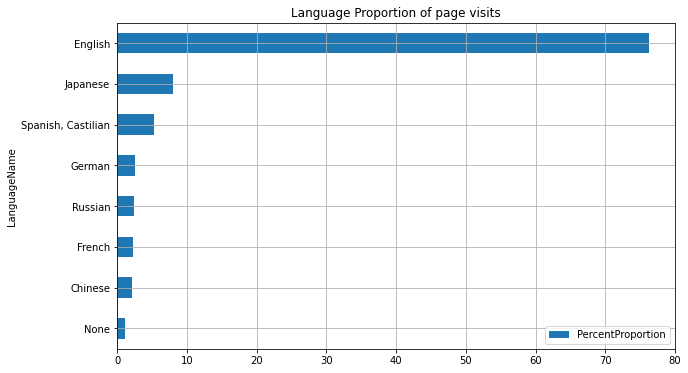

In [193]:
# convert query output to pandas dataframe and plot bar chart

dat = sqlite3.connect('toarstn92_wikipedia.db')
query = dat.execute("WITH LanguageGroup AS (SELECT DISTINCT LanguageName, COUNT(*) AS Count, 549000 AS Total FROM wikipedia_dataset2 LEFT JOIN languages2 USING (languageID) GROUP BY LanguageName) SELECT LanguageName, CAST(Count AS REAL)/TOTAL AS Proportion FROM LanguageGroup ORDER BY Proportion")
cols = [column[0] for column in query.description]
ProportionTable = pd.DataFrame.from_records(data = query.fetchall(), columns = cols)
ProportionTable['PercentProportion'] = (ProportionTable['Proportion'] / ProportionTable['Proportion'].sum()) * 100
ProportionTable.plot.barh(x='LanguageName', y='PercentProportion', figsize=(10, 6), title='Language Proportion of page visits', grid=True)

#### **5. Based on the provided dataset, which day(s) of the week is/are the most popular for visiting wikipedia? <br> <br> 6. Based on the provided dataset, which day(s) of the week is/are the least popular for visiting wikipedia?**

In [163]:
%%sql

WITH VisitsPerWeek AS (
    SELECT Weekday, SUM(WebpageVisits) AS TotalVisits
    FROM wikipedia_dataset2
    LEFT JOIN week2
        USING (weekdayID)
    GROUP BY Weekday)

SELECT "Most Popular" AS Popularity, *
FROM VisitsPerWeek
WHERE TotalVisits IN
    (SELECT MAX(TotalVisits)
     FROM VisitsPerWeek)
    
UNION

SELECT "Least Popular" AS Popularity, *
FROM VisitsPerWeek
WHERE TotalVisits IN
    (SELECT MIN(TotalVisits)
     FROM VisitsPerWeek)

ORDER BY Popularity DESC;

 * sqlite:///toarstn92_wikipedia.db
Done.


Popularity,Weekday,TotalVisits
Most Popular,Monday,4904874589
Least Popular,Friday,4409637606


<AxesSubplot:title={'center':'Web Visits per weekday'}, ylabel='Weekday'>

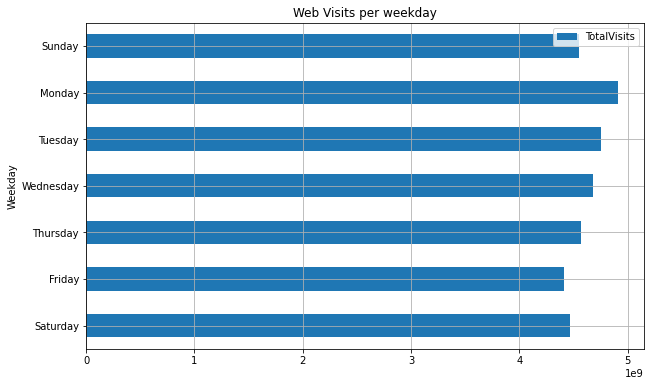

In [214]:
# convert query output to pandas dataframe and plot bar chart

dat = sqlite3.connect('toarstn92_wikipedia.db')
query2 = dat.execute("SELECT Weekday, SUM(WebpageVisits) AS TotalVisits FROM wikipedia_dataset2 LEFT JOIN week2 USING (weekdayID) GROUP BY Weekday ORDER BY WeekdayID DESC")
cols2 = [column[0] for column in query2.description]
VisitsPerWeekTable = pd.DataFrame.from_records(data = query2.fetchall(), columns = cols2)
VisitsPerWeekTable.plot.barh(x='Weekday', y='TotalVisits', figsize=(10, 6), title='Web Visits per weekday', grid=True)

#### **7. Based on the dataset provided, which device type is used more frequently for visiting wikipedia i.e. desktop or mobile devices?**
*Hint: For some of the pages in the dataset, it is possible to distinguish whether the visits to the page came from a desktop or a mobile device. For example, consider Barack Obama's wikipedia page:
<br> Barack_Obama_en.wikipedia.org_desktop_all-agents : these visits came from desktop devices.
<br> Barack_Obama_en.wikipedia.org_mobile-web_all-agents: these visits came from mobile devices.*

In [205]:
%%sql

WITH DeviceTypeCTE AS (
    SELECT *,
        CASE
            WHEN Page LIKE "%desktop%" THEN "Desktop Devices"
            WHEN Page LIKE "%mobile%" THEN "Mobile Devices"
            ELSE "All Access"
        END AS DeviceType2
    FROM wikipedia_dataset2)

SELECT DISTINCT DeviceType2, COUNT(*) AS VisitCount
FROM DeviceTypeCTE
GROUP BY DeviceType2
ORDER BY VisitCount DESC;

 * sqlite:///toarstn92_wikipedia.db
Done.


DeviceType2,VisitCount
All Access,341478
Mobile Devices,108336
Desktop Devices,99186


<AxesSubplot:title={'center':'Web Visits per device type'}, ylabel='PercentVisitCount'>

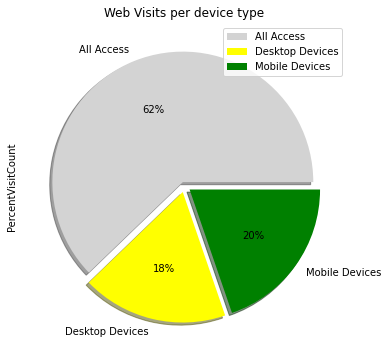

In [249]:
# convert query output to pandas dataframe and plot bar chart

dat = sqlite3.connect('toarstn92_wikipedia.db')
query3 = dat.execute('WITH DeviceTypeCTE AS (SELECT *, CASE WHEN Page LIKE "%desktop%" THEN "Desktop Devices" WHEN Page LIKE "%mobile%" THEN "Mobile Devices" ELSE "All Access" END AS DeviceType2 FROM wikipedia_dataset2) SELECT DISTINCT DeviceType2, COUNT(*) AS VisitCount FROM DeviceTypeCTE GROUP BY DeviceType2')
cols3 = [column[0] for column in query3.description]
DeviceTypeProportion = pd.DataFrame.from_records(data = query3.fetchall(), columns = cols3)
DeviceTypeProportion['PercentVisitCount'] = (DeviceTypeProportion['VisitCount'] / DeviceTypeProportion['VisitCount'].sum()) * 100
DeviceTypeProportion.groupby(['DeviceType2']).sum().plot(kind='pie', y='PercentVisitCount', autopct='%1.0f%%', colors=['lightgrey', 'yellow', 'green'], explode = (0.03, 0.05, 0.05), shadow=True, figsize=(6,6), title='Web Visits per device type')